# Dataset Presentation

In [1]:
import sys, os, json, pandas
import numpy as np

sys.path.append('../neural_network_dynamics/')
import nrn

sys.path.append('..')
import plot_tools as pt
import matplotlib.pylab as plt

/home/yann.zerlaut/miniconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1) Load and build dataset

In [2]:
datafolder = '../data/SchneiderMizell_et_al_2023'
DATASET = {}

for key in os.listdir(datafolder):
    if 'csv' in key:
        DATASET[key.replace('.csv', '')] = pandas.read_csv('../data/SchneiderMizell_et_al_2023/%s' % key)
        
# ID of the two cell types of interest:
for cType in ['MC', 'BC']:
    DATASET['%s_id' % cType] = DATASET['cell_types']['pt_root_id'][DATASET['cell_types']['cell_type_manual']==cType]
    
# need to correct the swc files bur thei use in brian2
def swc_correction(ID):
    """
    a small correction to replace the 'dendrite' label
    for the soma in the allen swc files (3 is replaced by 1)
    """
    fixed = ''
    with open(os.path.join(datafolder, 'skeletons' , 'swc', '%s.swc'%ID), "r") as file:
        for i, line in enumerate(file):
            if i==0:
                fixed += '0 1 '+line[4:]
            else:
                fixed += line
    with open(os.path.join(datafolder, 'skeletons' , '_fixed', '%s.swc'%ID), 'w') as f:
        f.write(fixed)
        
for cType in ['MC', 'BC']:
    for i, ID in enumerate(DATASET['%s_id' % cType]):
        swc_correction(ID)

In [3]:
print(DATASET.keys())
DATASET['cell_types']

dict_keys(['cell_types', 'inhibitory_synapses_onto_column', 'all_input_synapses', 'nonneuronal_cells', 'excitatory_properties', 'MC_id', 'BC_id'])


,Unnamed: 0,pt_root_id,cell_id,m_type,cell_type_manual,pt_position_um_x,pt_position_um_y,pt_position_um_z
0,0,864691135687112672,262825,L4c,4P,648.871757,374.743206,857.12
1,1,864691135162584621,298868,L4a,5P-IT,658.495023,377.833689,871.28
2,2,864691135988284416,298828,L4a,5P-IT,702.888652,382.231584,816.16
3,3,864691135476384680,298945,L4a,5P-IT,695.170942,382.327305,864.80
4,4,864691135590240523,299071,L4c,5P-IT,684.634392,381.598210,898.24
...,...,...,...,...,...,...,...,...
1341,1341,864691135058985115,269585,DTC,MC,611.953530,508.867955,919.80
1342,1342,864691135468031628,307287,DTC,Unsure I,651.601783,627.719795,974.16
1343,1343,864691135355455183,307126,STC,Unsure I,671.966250,616.716806,908.88
1344,1344,864691136118890776,305048,PTC,BC,663.755799,526.248960,889.12


## 1.a) Martinotti Cells

In [4]:
DATASET['cell_types'][DATASET['cell_types']['cell_type_manual']=='MC']

,Unnamed: 0,pt_root_id,cell_id,m_type,cell_type_manual,pt_position_um_x,pt_position_um_y,pt_position_um_z
1184,1184,864691135954232584,271673,DTC,MC,614.812947,574.583236,893.88
1197,1197,864691135969342309,267006,DTC,MC,602.412922,485.740429,843.48
1201,1201,864691135467660940,264932,DTC,MC,645.372146,429.430295,844.04
1206,1206,864691135737246596,266850,DTC,MC,613.464032,462.230133,810.92
1212,1212,864691135575445022,260622,DTC,MC,643.151767,282.244691,872.84
1218,1218,864691135988665856,269334,DTC,MC,623.691250,523.771678,830.00
1221,1221,864691135683637746,301085,DTC,MC,662.582431,433.184557,855.16
1222,1222,864691135571546917,264824,DTC,MC,636.470114,425.439245,825.20
1223,1223,864691135575425822,300835,DTC,MC,694.736380,433.556373,806.08
1224,1224,864691135502364341,296398,DTC,MC,685.804117,292.593468,805.60


## 1.b) Basket Cells

In [5]:
DATASET['cell_types'][DATASET['cell_types']['cell_type_manual']=='BC']

,Unnamed: 0,pt_root_id,cell_id,m_type,cell_type_manual,pt_position_um_x,pt_position_um_y,pt_position_um_z
1185,1185,864691135208091769,264783,PTC,BC,611.667464,441.643212,823.20
1187,1187,864691135490941927,262555,PTC,BC,648.739995,351.282447,812.24
1198,1198,864691135428992816,301120,PTC,BC,704.729902,407.448015,843.48
1203,1203,864691135256624047,256622,PTC,BC,653.335402,153.361815,890.88
1205,1205,864691135367305465,298957,PTC,BC,710.182524,323.829047,854.72
1207,1207,864691136371168136,260609,PTC,BC,626.944852,278.770946,865.88
1208,1208,864691135385703509,301245,PTC,BC,704.588834,406.857473,894.64
1209,1209,864691135585515900,298897,PTC,BC,676.282382,317.715190,849.24
1210,1210,864691135233532505,292649,PTC,BC,687.052310,165.241643,820.48
1211,1211,864691135502190941,267293,PTC,BC,630.741079,449.800629,889.20


# 2) Plot all morphologies

In [6]:
def plot_all_morphologies(cType, Nx = 4,
                          dendrite_color='k',
                          axon_color='tab:blue'):
    
    Ny = int(len(DATASET['%s_id' % cType]) / Nx)
    
    fig, AX = pt.plt.subplots(Ny+1, Nx, figsize=(1.7*Nx, 1.4*Ny))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, ID in enumerate(DATASET['%s_id' % cType]):
        morpho = nrn.Morphology.from_swc_file(os.path.join(datafolder,
                                                           'skeletons', '_fixed', '%s.swc'%ID))
        SEGMENTS = nrn.morpho_analysis.compute_segments(morpho)
        vis = pt.nrnvyz(SEGMENTS)
        if axon_color is not None:
            vis.plot_segments(cond=(SEGMENTS['comp_type']=='axon'),
                              color=axon_color,
                              bar_scale_args={'Ybar':100, 'Xbar':1e-9,
                                              'Ybar_label':'100$\mu$m ', 'fontsize':6},
                              ax=AX[int(i/Nx)][i%Nx])
        vis.plot_segments(cond=(SEGMENTS['comp_type']!='axon'),
                          color=dendrite_color,
                          bar_scale_args=None,
                          ax=AX[int(i/Nx)][i%Nx])

        AX[int(i/Nx)][i%Nx].set_title('%i ) %s' % (i+1, ID), fontsize=6)

    while i<(Nx*(Ny+1)-1):
        i+=1
        AX[int(i/Nx)][i%Nx].axis('off')
    AX[-1][-1].annotate('dendrite', (0,1), xycoords='axes fraction', va='top', color=dendrite_color)
    AX[-1][-1].annotate('\naxon', (0,1), xycoords='axes fraction', va='top', color=axon_color)
    
    return fig, AX

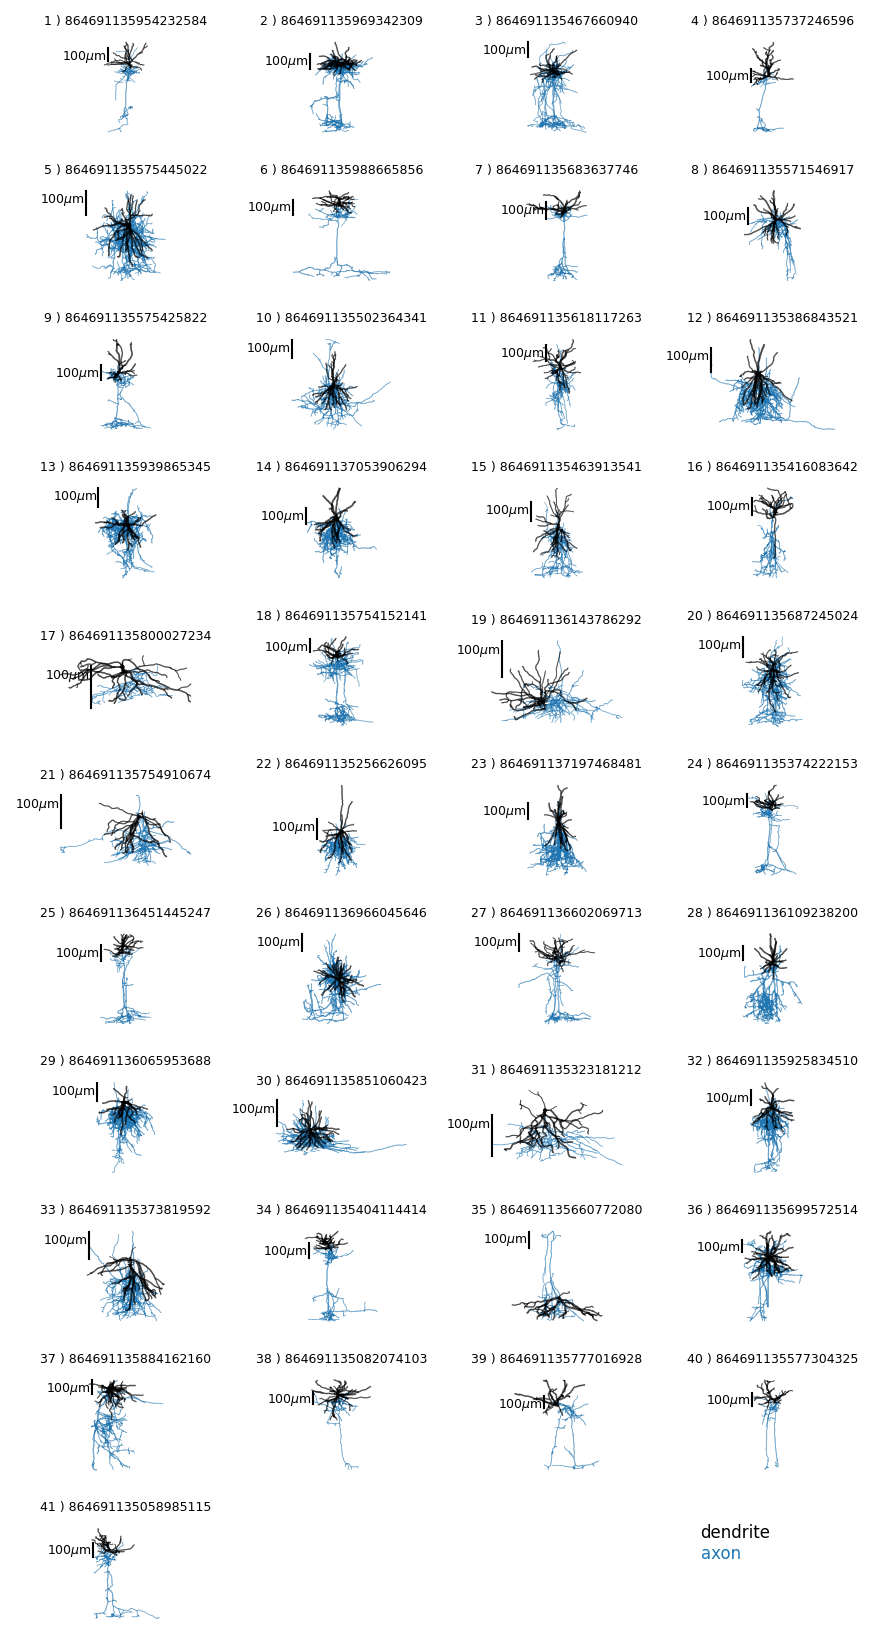

In [7]:
fig, AX = plot_all_morphologies('MC')#, axon_color=None)
fig.savefig('../figures/all_Martinotti_cells_morphologies.svg')

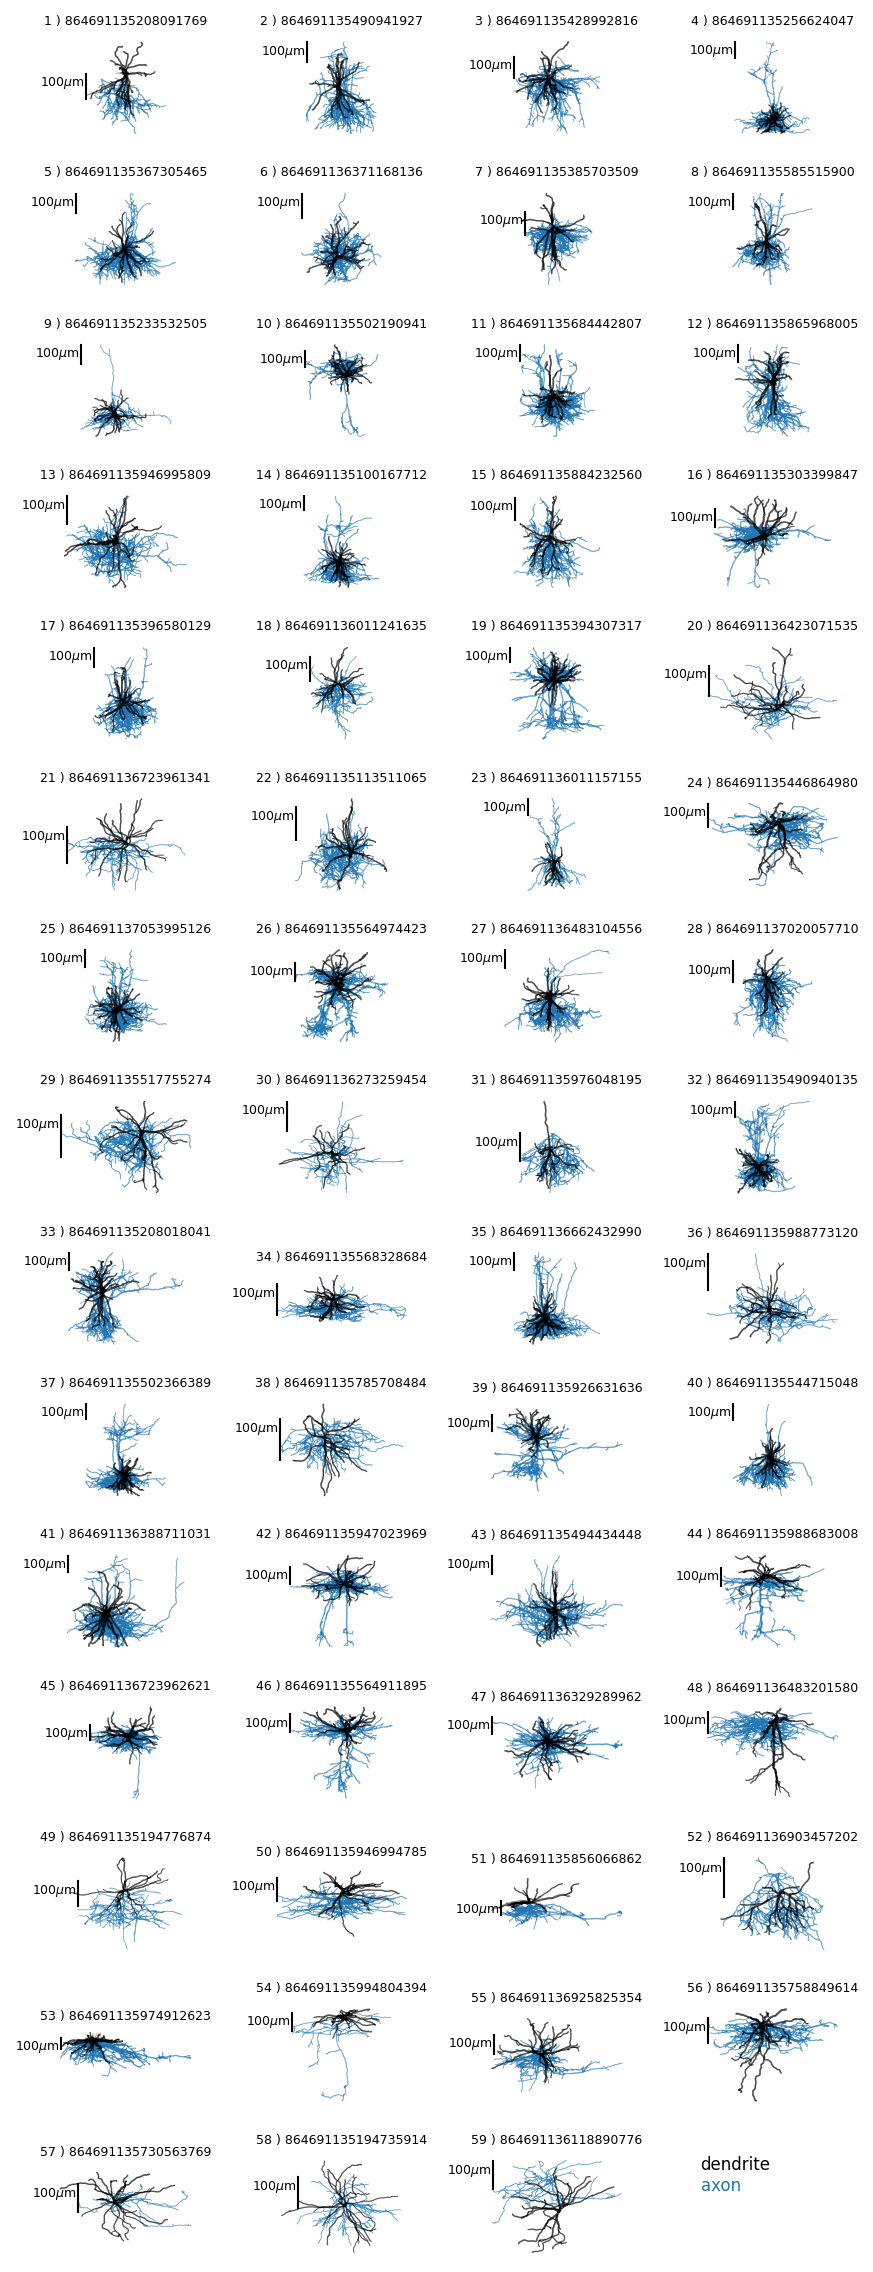

In [8]:
fig, AX = plot_all_morphologies('BC')#, axon_color=None)
fig.savefig('../figures/all_Basket_cells_morphologies.svg')

## Basket cell example

In [9]:
BC_example_ID = 864691135100167712
BC_example_index = np.flatnonzero(np.array(DATASET['BC_id'],dtype=int)==BC_example_ID)[0]

morpho = nrn.Morphology.from_swc_file(os.path.join(datafolder,
                                                   'skeletons', '_fixed', '%s.swc' % BC_example_ID))
SEGMENTS = nrn.morpho_analysis.compute_segments(morpho)
vis = nrnvyz(SEGMENTS)
vis.plot_segments(cond=(SEGMENTS['comp_type']!='axon'),
                  bar_scale_args={'Ybar':100, 'Xbar':1e-9,
                                              'Ybar_label':'100$\mu$m ', 'fontsize':6})
plt.gca().set_title('%i ) %s' % (BC_example_index+1, BC_example_ID), fontsize=6)

fig.savefig('../figures/Basket_cell_example_dendrite.svg')

NameError: name 'nrnvyz' is not defined

## Martinotti cell example

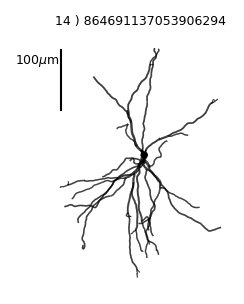

In [8]:
MC_example_ID = 864691137053906294
MC_example_index = np.flatnonzero(np.array(DATASET['MC_id'],dtype=int)==MC_example_ID)[0]

morpho = nrn.Morphology.from_swc_file(os.path.join(datafolder,
                                                   'skeletons', '_fixed', '%s.swc' % MC_example_ID))
SEGMENTS = nrn.morpho_analysis.compute_segments(morpho)
vis = nrnvyz(SEGMENTS)
vis.plot_segments(cond=(SEGMENTS['comp_type']!='axon'),
                  bar_scale_args={'Ybar':100, 'Xbar':1e-9,
                                  'Ybar_label':'100$\mu$m ', 'fontsize':6})
plt.gca().set_title('%i ) %s' % (MC_example_index+1, MC_example_ID), fontsize=6)

plt.savefig('../figures/Martinotti_cell_example_dendrite.svg')

# 3) Layer classification

*Based on Pyramidal Cell label in the dataset !*

Text(0, 0.5, 'count')

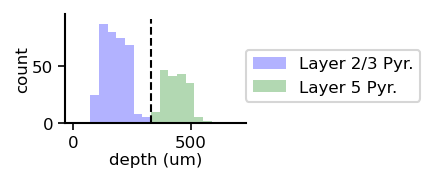

In [72]:
threshold = 330

MC_cond = DATASET['cell_types']['cell_type_manual']=='MC'
Layer23_cond = DATASET['cell_types']['cell_type_manual']=='23P'
Layer4_cond = DATASET['cell_types']['cell_type_manual']=='4P'
Layer5_cond = (DATASET['cell_types']['cell_type_manual']=='5P-IT') |\
        (DATASET['cell_types']['cell_type_manual']=='5P-NP') | \
        (DATASET['cell_types']['cell_type_manual']=='5P-PT')

bins = np.linspace(0, 700, 20)
plt.hist(DATASET['cell_types']['pt_position_um_y'][Layer23_cond], 
         bins=bins, color='blue', label='Layer 2/3 Pyr.', alpha=.3)
#plt.hist(DATASET['cell_types']['pt_position_um_y'][Layer4_cond],
#         bins=bins, color='magenta', label='Layer 4 Pyr.', alpha=.3)
plt.hist(DATASET['cell_types']['pt_position_um_y'][Layer5_cond],
         bins=bins, color='green', label='Layer 5 Pyr.', alpha=.3)
plt.legend(loc=(1., 0.2))
plt.plot([threshold, threshold], [0, plt.gca().get_ylim()[1]], 'k--')
plt.xlabel('depth (um)')
plt.ylabel('count')

## 3.a) Martinotti Cells

We use the depth coordinate `pt_position_um_y` to split Layer 2/3 and Layer 5 Martinotti cells

--> Layer 2/3: below 300$\mu$m 

--> Layer 5: above 300$\mu$m

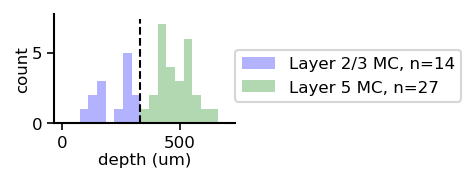

In [73]:
MC_cond = DATASET['cell_types']['cell_type_manual']=='MC'
Layer23_cond = DATASET['cell_types']['pt_position_um_y']<=threshold
Layer5_cond = DATASET['cell_types']['pt_position_um_y']>threshold

bins = np.linspace(0, 700, 20)
plt.hist(DATASET['cell_types']['pt_position_um_y'][MC_cond & Layer23_cond],
         bins=bins, color='blue', alpha=.3,
         label='Layer 2/3 MC, n=%i' % np.sum(MC_cond & Layer23_cond))

plt.hist(DATASET['cell_types']['pt_position_um_y'][MC_cond & Layer5_cond],
         bins=bins, color='green', alpha=.3,
         label='Layer 5 MC, n=%i' % np.sum(MC_cond & Layer5_cond))

plt.legend(loc=(1., 0.2))
plt.plot([threshold, threshold], [0, plt.gca().get_ylim()[1]], 'k--')

plt.xlabel('depth (um)')
plt.ylabel('count');

In [81]:
Layer23_MC_indices = []
for i, ID in enumerate(DATASET['MC_id']):
    if np.array(DATASET['cell_types']['pt_position_um_y'])[np.array(DATASET['cell_types']['pt_root_id'])==ID]<threshold:
        Layer23_MC_indices.append(i)
Layer23_MC_indices # PRINT TO USE IN OTHER NOTEBOOKS !

[4, 9, 11, 14, 16, 18, 19, 20, 21, 25, 29, 30, 32, 34]

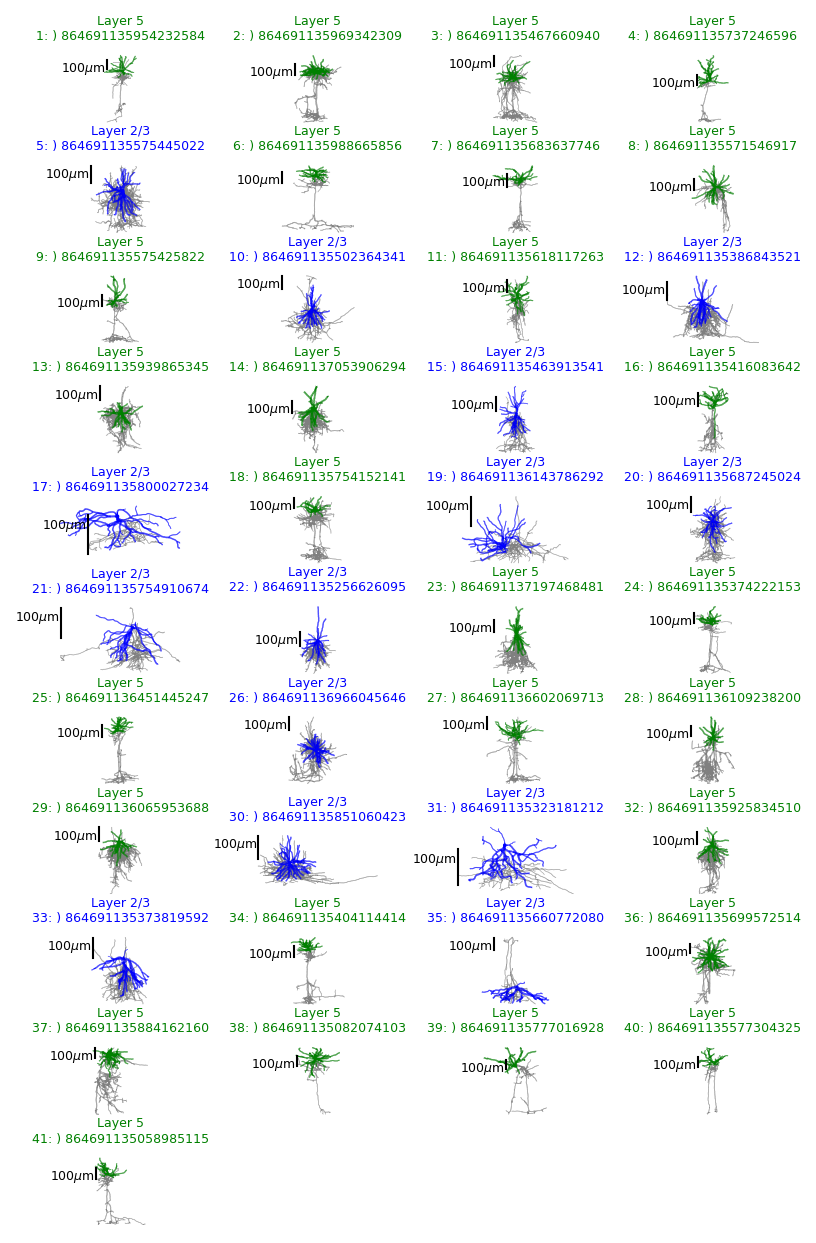

In [82]:
cType = 'MC'
L23_indices = Layer23_MC_indices
Nx = 4

Ny = int(len(DATASET['%s_id' % cType]) / Nx)

fig, AX = pt.plt.subplots(Ny+1, Nx, figsize=(1.7*Nx, 1.4*Ny))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, ID in enumerate(DATASET['%s_id' % cType]):
    morpho = nrn.Morphology.from_swc_file(os.path.join(datafolder,
                                                       'skeletons', '_fixed', '%s.swc'%ID))
    SEGMENTS = nrn.morpho_analysis.compute_segments(morpho)
    vis = nrnvyz(SEGMENTS)

    vis.plot_segments(cond=(SEGMENTS['comp_type']=='axon'),
                      color='grey',
                      bar_scale_args={'Ybar':100, 'Xbar':1e-9,
                                      'Ybar_label':'100$\mu$m ', 'fontsize':6},
                      ax=AX[int(i/Nx)][i%Nx])
    vis.plot_segments(cond=(SEGMENTS['comp_type']!='axon'),
                      color='blue' if i in L23_indices else 'green',
                      bar_scale_args=None,
                      ax=AX[int(i/Nx)][i%Nx])

    AX[int(i/Nx)][i%Nx].set_title('%s\n%i: ) %s' % ('Layer 2/3' if i in L23_indices else 'Layer 5',
                                                   i+1,
                                                   ID), 
                                  color='blue' if i in L23_indices else 'green',
                                  fontsize=6)

while i<(Nx*(Ny+1)-1):
    i+=1
    AX[int(i/Nx)][i%Nx].axis('off')